In [1]:
import plotly.graph_objs as go
import numpy as np
import pandas as pd

from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [2]:
df = pd.read_csv('covid_19_data.csv')

In [3]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

In [5]:
df['Confirmed']=df['Confirmed'].astype('int')

In [6]:
df['Deaths']=df['Deaths'].astype('int')

In [7]:
df['Rate'] = (df['Deaths']/df['Confirmed'])*100

In [8]:
df.fillna(0, inplace=True)

In [9]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Rate
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1,0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14,0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6,0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1,0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0,0,0.0,0.0


In [10]:
grouped_df =df.groupby(['ObservationDate','Country/Region']).sum().reset_index()

In [11]:
grouped_df['Rate'] = (grouped_df['Deaths']/grouped_df['Confirmed'])*100

In [12]:
grouped_df.fillna(0, inplace=True)

In [13]:
grouped_df.head()

,ObservationDate,Country/Region,SNo,Confirmed,Deaths,Recovered,Rate
0,2020-01-22,Hong Kong,13,0,0,0.0,0.000000
1,2020-01-22,Japan,36,2,0,0.0,0.000000
2,2020-01-22,Macau,21,1,0,0.0,0.000000
3,2020-01-22,Mainland China,535,547,17,28.0,3.107861
4,2020-01-22,South Korea,38,1,0,0.0,0.000000


In [14]:
#country_list = grouped_df['Country/Region'].unique().tolist()
#country_list.sort()

In [15]:
country_list = ['Italy','Mainland China','UK','US','Turkey','Spain','Portugal','Iran']
country_list.sort()

In [16]:
time_series_text = dict()
for country in country_list:
    text = []
    country_df = grouped_df[(grouped_df['Country/Region']==country) & (grouped_df['Deaths'] > 0)]
    for i in range(0,country_df.shape[0]):
        text.append('<br><b>' + 'Confirmed: </b>' + str(country_df['Confirmed'].iloc[i]) +\
            '<br><b>' + 'Deaths: </b> {}'.format(country_df['Deaths'].iloc[i]))
    time_series_text[country] = text

In [25]:
traces = []
for country in country_list:
    country_df = grouped_df[(grouped_df['Country/Region']==country) & (grouped_df['Deaths'] > 0)]
    text= '<br><b>Confirmed:</b> {}'.format(country_df["Confirmed"]) + '<b>Deaths:</b> {}'.format(country_df["Deaths"])
    traces.append(go.Scattergl(
        x = country_df['ObservationDate'],
        y = country_df['Rate'],
        mode='lines',
        hovertemplate ='<b>Date</b>: %{x}<br>'+'<b>Rate</b>: %{y}'+'%{text}',
        text=time_series_text[country],
        line=dict(width= 5 if country == 'Turkey' else 3),
        name=str(country),
        showlegend=True
    ))

In [26]:
layout = go.Layout(
    height=600,
    width= 1200,
    legend={'traceorder':'normal'},
    xaxis=dict(
        title='Date',
        type='date',
        showline=True,
        showgrid=True,
        range=['2020-01-20','2020-04-16'],
        showticklabels=True,
        linewidth=2,
        linecolor='black',
        gridcolor='gray'
    ),
    yaxis=dict(
        title='Mortality Rate (%)',
        #type="log",
        showgrid=True,
        zeroline=True,
        showline=True,
        linewidth=2,
        linecolor='black',
        gridcolor='gray'
    ),
    plot_bgcolor='white' 
)

In [27]:
fig = go.Figure(data=traces, layout =layout)

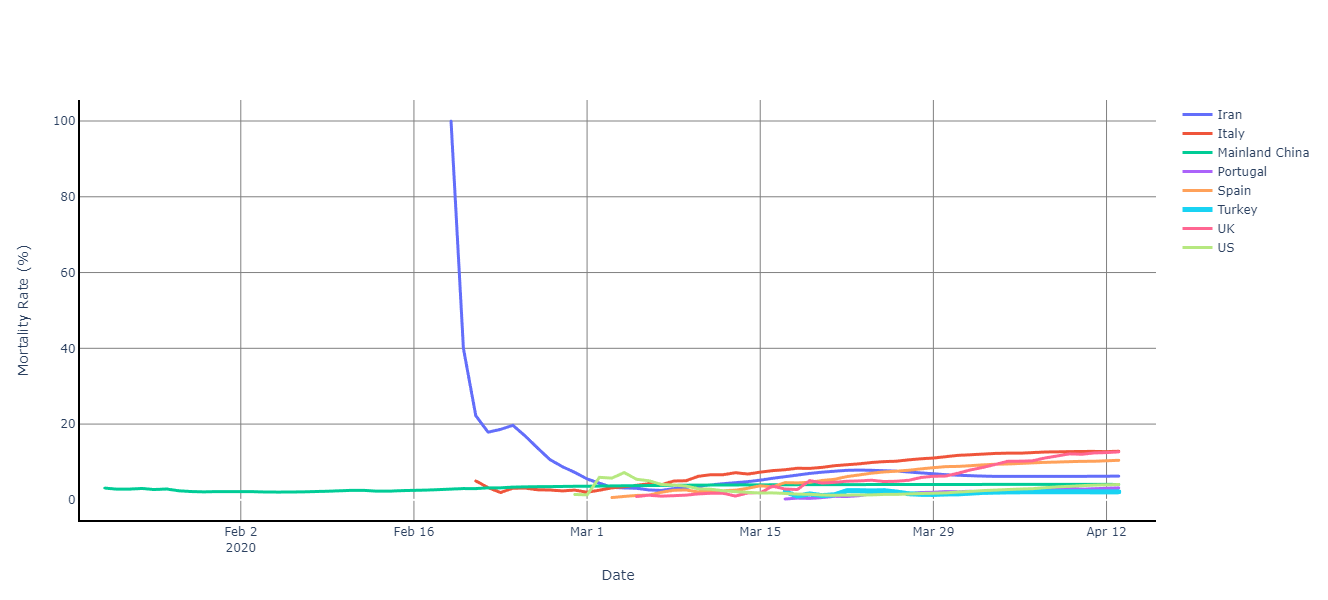

In [28]:
iplot(fig)

In [22]:
grouped_df[grouped_df['Country/Region']=='Iran'].head()

,ObservationDate,Country/Region,SNo,Confirmed,Deaths,Recovered,Rate
696,2020-02-19,Iran,1844,2,2,0.0,100.000000
727,2020-02-20,Iran,1913,5,2,0.0,40.000000
758,2020-02-21,Iran,1981,18,4,0.0,22.222222
791,2020-02-22,Iran,2063,28,5,0.0,17.857143
824,2020-02-23,Iran,2146,43,8,0.0,18.604651


In [23]:
grouped_df[grouped_df['Country/Region']=='Turkey'].head()

,ObservationDate,Country/Region,SNo,Confirmed,Deaths,Recovered,Rate
2197,2020-03-11,Turkey,4916,1,0,0.0,0.0
2316,2020-03-12,Turkey,5136,1,0,0.0,0.0
2444,2020-03-13,Turkey,5234,5,0,0.0,0.0
2586,2020-03-14,Turkey,5563,5,0,0.0,0.0
2734,2020-03-15,Turkey,5812,6,0,0.0,0.0
